# Tutorial


## Example in 2D Uniform Distribution

This example generates a 2D random uniform distribution, and then uses GriSPy to search neighbors within a given radius and/or the n-nearest neighbors

----------------------------------------------------------------

### Import GriSPy and others packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from grispy import GriSPy

In [9]:
%matplotlib notebook

### Create random points and centres

In [2]:
Npoints = 10 ** 3
Ncentres = 2
dim = 2
Lbox = 100.0

np.random.seed(0)
data = np.random.uniform(0, Lbox, size=(Npoints, dim))
centres = np.random.uniform(0, Lbox, size=(Ncentres, dim))

### Build the grid with the data

In [3]:
gsp = GriSPy(data)

Set periodicity. Periodic conditions on x-axis (or axis=0) and y-axis (or axis=1)

In [4]:
periodic = {0: (0, Lbox), 1: (0, Lbox)}
gsp.set_periodicity(periodic)

Also you can build a periodic grid in the same step

In [5]:
gsp = GriSPy(data, periodic=periodic)

### Query for neighbors within upper_radii

In [6]:
upper_radii = 10.0
bubble_dist, bubble_ind = gsp.bubble_neighbors(
    centres, distance_upper_bound=upper_radii
)

### Query for neighbors in a shell within lower_radii and upper_radii

In [11]:
upper_radii = 10.0
lower_radii = 8.0
shell_dist, shell_ind = gsp.shell_neighbors(
    centres,
    distance_lower_bound=lower_radii,
    distance_upper_bound=upper_radii
)

### Query for nth nearest neighbors

In [18]:
n_nearest = 10
near_dist, near_ind = gsp.nearest_neighbors(centres, n=n_nearest)

9000 10


### Plot results

<IPython.core.display.Javascript object>


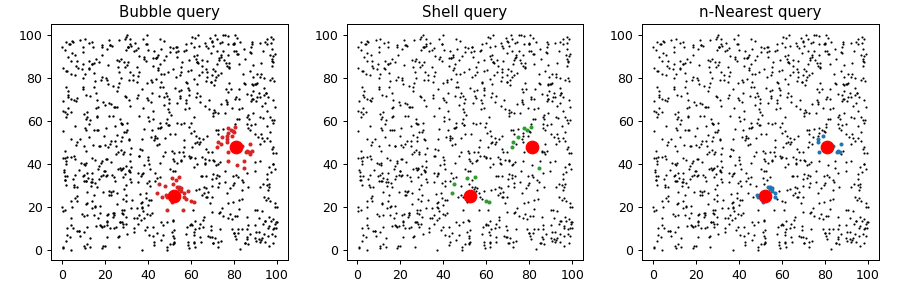

In [25]:
plt.figure(4, figsize=(10,3.2))

plt.subplot(1,3,1, aspect='equal')
plt.title("Bubble query")
plt.scatter(data[:, 0], data[:, 1], c="k", marker=".", s=3)
for ind in bubble_ind:
    plt.scatter(data[ind, 0], data[ind, 1], c="C3", marker="o", s=5)
plt.plot(centres[:,0],centres[:,1],'ro',ms=10)


plt.subplot(1,3,2, aspect='equal')
plt.title("Shell query")
plt.scatter(data[:, 0], data[:, 1], c="k", marker=".", s=2)
for ind in shell_ind:
    plt.scatter(data[ind, 0], data[ind, 1], c="C2", marker="o", s=5)
plt.plot(centres[:,0],centres[:,1],'ro',ms=10)

plt.subplot(1,3,3, aspect='equal')
plt.title("n-Nearest query")
plt.scatter(data[:, 0], data[:, 1], c="k", marker=".", s=2)
for ind in near_ind:
    plt.scatter(data[ind, 0], data[ind, 1], c="C0", marker="o", s=5)
plt.plot(centres[:,0],centres[:,1],'ro',ms=10)

plt.tight_layout()